<a href="https://colab.research.google.com/github/gabriel-reis12/Linear-Regression-Project/blob/main/Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalando Libs
!pip install pycaret
!pip install yfinance

In [5]:
#importando bibliotecas
import pandas as pd
import yfinance as yf

In [ ]:
#Escolher uma ação
df = yf.Ticker('RADL3.SA')

#Escolher o intervalo de dados
raia = df.history(period='2y')
raia

In [22]:
#Refazendo o DF - retirar Dividends e Stock Splits
raia = raia.drop(['Dividends','Stock Splits'], axis=1)

In [ ]:
#Criando novos Campos

#Média móvel para 7 dias
raia['MM7D'] = raia['Close'].rolling(window =7).mean().round(2)

#Média móvel para 30 dias
raia['MM30D'] = raia['Close'].rolling(window =30).mean().round(2)
raia

In [ ]:
#Coletar últimos 5 dias
raia_prever = raia.tail(6)
raia_prever.drop(raia_prever.tail(1).index, inplace=True)
raia_prever

In [ ]:
#Retirar os dados do DF
raia.drop(raia.tail(6).index, inplace=True)
raia

In [ ]:
#Empurra para frente os valores das ações
raia.Close = raia.Close.shift(-1)
raia

In [ ]:
#Removendo NaN
raia.dropna(inplace=True)
raia

In [28]:
#Resetar index
raia.reset_index(drop=True, inplace=True)
raia_prever.reset_index(drop=True, inplace=True)

In [30]:
#Importar a bibilioteca de regrassão do Pycaret
from pycaret.regression import *
setup(data= raia, target='Close', session_id=123)

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(463, 7)"
4,Transformed data shape,"(463, 7)"
5,Transformed train set shape,"(324, 7)"
6,Transformed test set shape,"(139, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [31]:
#Gerar modelos e comparar o top 3 baseado no R2
top3 = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.3207,0.1713,0.4105,0.9842,0.0168,0.0137,0.7490
ridge,Ridge Regression,0.3212,0.1716,0.4109,0.9842,0.0169,0.0137,0.0200
br,Bayesian Ridge,0.3210,0.1716,0.4108,0.9842,0.0169,0.0137,0.0210
lar,Least Angle Regression,0.3223,0.1738,0.4133,0.9840,0.0170,0.0138,0.0220
et,Extra Trees Regressor,0.3506,0.2123,0.4541,0.9805,0.0189,0.0151,0.2780
rf,Random Forest Regressor,0.3464,0.2163,0.4573,0.9804,0.0189,0.0148,0.2240
lightgbm,Light Gradient Boosting Machine,0.3520,0.2183,0.4645,0.9803,0.0194,0.0152,0.0760
gbr,Gradient Boosting Regressor,0.3467,0.2195,0.4625,0.9799,0.0193,0.0149,0.1120
xgboost,Extreme Gradient Boosting,0.3699,0.2344,0.4803,0.9784,0.0199,0.0159,0.1230
en,Elastic Net,0.3970,0.2535,0.5018,0.9769,0.0210,0.0172,0.0210


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [34]:
ridge = create_model('ridge', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3953,0.2086,0.4568,0.9718,0.0188,0.0168
1,0.2849,0.1194,0.3455,0.9916,0.0142,0.0123
2,0.2843,0.1342,0.3663,0.9892,0.0151,0.0122
3,0.3251,0.1609,0.4011,0.9786,0.0157,0.0133
4,0.2716,0.1330,0.3647,0.9895,0.0150,0.0118
5,0.3186,0.1556,0.3945,0.9877,0.0181,0.0146
6,0.2630,0.1415,0.3762,0.9850,0.0163,0.0116
7,0.3570,0.1865,0.4319,0.9848,0.0178,0.0153
8,0.3850,0.2832,0.5321,0.9780,0.0206,0.0155


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [35]:
lr = create_model('lr', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3967,0.2117,0.4601,0.9714,0.0190,0.0169
1,0.2814,0.1178,0.3433,0.9917,0.0141,0.0121
2,0.2842,0.1358,0.3685,0.9891,0.0152,0.0122
3,0.3269,0.1614,0.4018,0.9785,0.0157,0.0134
4,0.2745,0.1342,0.3664,0.9894,0.0150,0.0119
5,0.3167,0.1521,0.3900,0.9880,0.0179,0.0145
6,0.2601,0.1383,0.3719,0.9854,0.0161,0.0115
7,0.3526,0.1832,0.4280,0.9851,0.0176,0.0151
8,0.3866,0.2810,0.5301,0.9782,0.0205,0.0155


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
br = create_model('br', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3958,0.2096,0.4578,0.9717,0.0189,0.0168
1,0.2841,0.1190,0.3449,0.9916,0.0141,0.0123
2,0.2840,0.1345,0.3668,0.9892,0.0151,0.0122
3,0.3256,0.1610,0.4012,0.9786,0.0157,0.0133
4,0.2723,0.1333,0.3651,0.9895,0.0150,0.0118
5,0.3182,0.1548,0.3935,0.9877,0.0181,0.0146
6,0.2621,0.1408,0.3752,0.9851,0.0163,0.0116
7,0.3560,0.1857,0.4309,0.9849,0.0177,0.0152
8,0.3854,0.2824,0.5314,0.9781,0.0205,0.0155


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
#Tunning ridge - Buscando melhores resultados
ridge_parameters = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
tune_ridge = tune_model(ridge, n_iter=1000, optimize='RMSE', custom_grid=ridge_parameters)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3967,0.2117,0.4601,0.9714,0.0190,0.0169
1,0.2815,0.1178,0.3433,0.9917,0.0141,0.0121
2,0.2842,0.1358,0.3684,0.9891,0.0152,0.0122
3,0.3268,0.1614,0.4017,0.9785,0.0157,0.0134
4,0.2744,0.1342,0.3663,0.9894,0.0150,0.0119
5,0.3168,0.1522,0.3901,0.9880,0.0179,0.0145
6,0.2601,0.1384,0.3720,0.9854,0.0161,0.0115
7,0.3527,0.1832,0.4280,0.9851,0.0176,0.0151
8,0.3865,0.2810,0.5301,0.9782,0.0205,0.0155


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=1000. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [38]:
#Tunning Lr - Buscando melhores resultados
tune_lr = tune_model(lr, n_iter=1000, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3961,0.2086,0.4567,0.9718,0.0189,0.0169
1,0.2771,0.1150,0.3391,0.9919,0.0138,0.0119
2,0.2853,0.1384,0.3720,0.9889,0.0154,0.0122
3,0.3143,0.1510,0.3886,0.9799,0.0152,0.0129
4,0.2602,0.1257,0.3546,0.9901,0.0143,0.0113
5,0.3201,0.1542,0.3927,0.9878,0.0181,0.0146
6,0.2711,0.1439,0.3793,0.9848,0.0165,0.0121
7,0.3558,0.1879,0.4335,0.9847,0.0178,0.0152
8,0.3914,0.2871,0.5359,0.9777,0.0207,0.0158


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [39]:
#Tunning Br - Buscando melhores resultados
tune_br = tune_model(br, n_iter=1000, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3955,0.2072,0.4552,0.9720,0.0189,0.0168
1,0.2790,0.1155,0.3398,0.9918,0.0138,0.0120
2,0.2854,0.1373,0.3706,0.9889,0.0153,0.0122
3,0.3132,0.1506,0.3881,0.9799,0.0152,0.0128
4,0.2584,0.1249,0.3535,0.9901,0.0143,0.0112
5,0.3213,0.1561,0.3951,0.9876,0.0183,0.0147
6,0.2724,0.1458,0.3818,0.9846,0.0166,0.0121
7,0.3588,0.1897,0.4355,0.9846,0.0179,0.0153
8,0.3908,0.2883,0.5369,0.9777,0.0208,0.0157


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


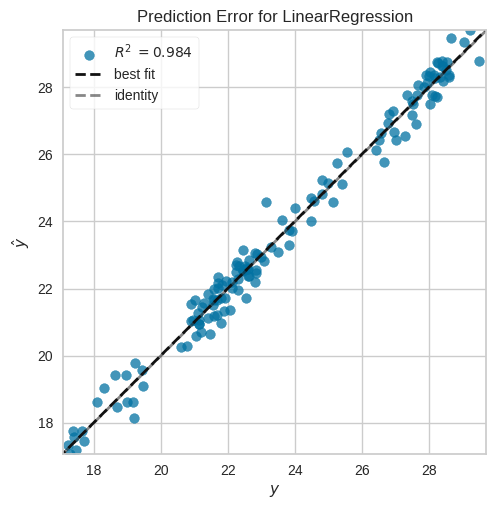

In [40]:
#Gráficos de erro
plot_model(tune_lr, plot='error')

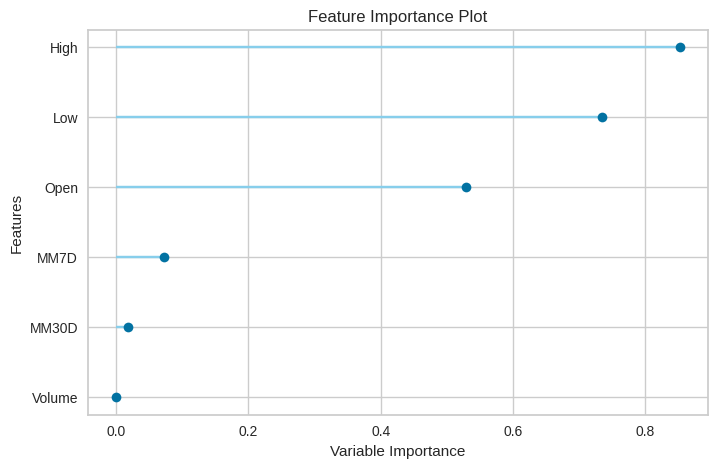

In [41]:
plot_model(tune_lr, plot='feature')

In [42]:
#Testando com dados de Treinamento
predict_model(tune_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.3399,0.1736,0.4167,0.9842,0.0175,0.0147


,Open,High,Low,Volume,MM7D,MM30D,Close,prediction_label
49,17.855661,17.902750,17.309444,9537216,18.170000,20.680000,17.704981,17.446897
85,17.846241,17.987503,17.610802,4945824,18.350000,18.760000,17.639057,17.755471
34,20.690342,21.274229,20.662090,9652656,21.190001,21.600000,21.142384,21.077464
231,23.968222,24.148865,23.882658,5882656,23.540001,22.770000,23.606943,24.054109
236,22.456545,22.789305,22.342455,4995640,23.250000,22.860001,22.542112,22.598694
...,...,...,...,...,...,...,...,...
347,27.849602,27.949064,27.521374,4181900,28.209999,28.410000,28.227560,27.692895
191,21.816896,22.518833,21.323645,13836992,21.650000,22.799999,22.281696,21.963207
277,23.320381,23.920536,23.310854,9066304,23.350000,22.650000,23.815748,23.754717
6,21.314013,22.019152,21.107172,9898616,21.830000,21.490000,21.022552,21.657605


In [43]:
#Finalizar o modelo
final_lr_model = finalize_model(tune_lr)

In [44]:
#Previsão
prev = predict_model(final_lr_model, data=raia_prever)
prev

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1193,0.0206,0.1436,0.8673,0.0048,0.0042


,Open,High,Low,Volume,MM7D,MM30D,Close,prediction_label
0,29.139999,29.430000,28.920000,4092400,29.25,28.850000,29.020000,29.215662
1,29.150000,29.150000,28.280001,3312700,29.15,28.860001,28.690001,28.522960
2,28.540001,28.680000,28.150000,4311100,29.00,28.830000,28.170000,28.357249
3,28.080000,28.480000,27.809999,3002300,28.85,28.790001,28.150000,28.193654
4,28.170000,28.209999,27.799999,1919500,28.67,28.780001,27.959999,27.957133


In [45]:
#Salvando o modelo para utilizar com dados novos
save_model(final_lr_model, 'Modelo Final Linear Regression Pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Open', 'High', 'Low', 'Volume',
                                              'MM7D', 'MM30D'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  LinearRegression(fit_intercept=False, n_jobs=-1))]),
 'Modelo Final Linear Regression Pycaret.pkl')

In [46]:
#Dados Novos
novo_dado = yf.download('RADL3.SA', period='45d')
novo_dado

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-09,26.129999,26.200001,25.670000,25.830000,25.740637,7110900
2023-11-10,26.040001,26.969999,25.600000,26.750000,26.657454,6189900
2023-11-13,26.740000,26.799999,26.010000,26.590000,26.498009,5370000
2023-11-14,26.780001,27.570000,26.570000,27.320000,27.225483,6509300
2023-11-16,27.670000,28.100000,27.389999,27.879999,27.783545,7365900
2023-11-17,27.850000,27.990000,27.340000,27.350000,27.255379,5221500
2023-11-20,27.549999,28.639999,27.410000,28.600000,28.501055,7396600
2023-11-21,28.459999,28.530001,28.219999,28.260000,28.162231,4922600
2023-11-22,28.480000,29.129999,28.330000,28.400000,28.301746,7406100


In [47]:
#Retirar campos
novo_dado = novo_dado.drop('Adj Close', axis=1)

#Retirar Index
novo_dado.reset_index(drop=True, inplace=True)

#Criar novos Campos

novo_dado['MM7D'] = novo_dado['Close'].rolling(window =7).mean().round(2)
novo_dado['MM30D'] = novo_dado['Close'].rolling(window =30).mean().round(2)

novo_dado

,Open,High,Low,Close,Volume,MM7D,MM30D
0,26.129999,26.200001,25.670000,25.830000,7110900,NaN,NaN
1,26.040001,26.969999,25.600000,26.750000,6189900,NaN,NaN
2,26.740000,26.799999,26.010000,26.590000,5370000,NaN,NaN
3,26.780001,27.570000,26.570000,27.320000,6509300,NaN,NaN
4,27.670000,28.100000,27.389999,27.879999,7365900,NaN,NaN
5,27.850000,27.990000,27.340000,27.350000,5221500,NaN,NaN
6,27.549999,28.639999,27.410000,28.600000,7396600,27.19,NaN
7,28.459999,28.530001,28.219999,28.260000,4922600,27.54,NaN
8,28.480000,29.129999,28.330000,28.400000,7406100,27.77,NaN
9,28.350000,28.760000,28.129999,28.350000,2806700,28.02,NaN


In [48]:
novo_dado = novo_dado.tail(1)
novo_dado

,Open,High,Low,Close,Volume,MM7D,MM30D
44,27.67,27.74,27.49,27.49,490100,28.38,28.79


In [49]:
#Reutilizando modelo
saved_final_lr_model = load_model('Modelo Final Linear Regression Pycaret')

Transformation Pipeline and Model Successfully Loaded


In [50]:
#Prevendo o novo dado
nova_previsão = predict_model(saved_final_lr_model, data=novo_dado)
nova_previsão.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1513,0.0229,0.1513,nan,0.0053,0.0055


,Open,High,Low,Volume,MM7D,MM30D,Close,prediction_label
44,27.67,27.74,27.49,490100,28.379999,28.790001,27.49,27.641334


finalizando, a previsão de fechamento para o próximo dia é de 27.64

#Gráfico comparativo entre fechamento real e previsões

In [51]:
import matplotlib.pyplot as plt

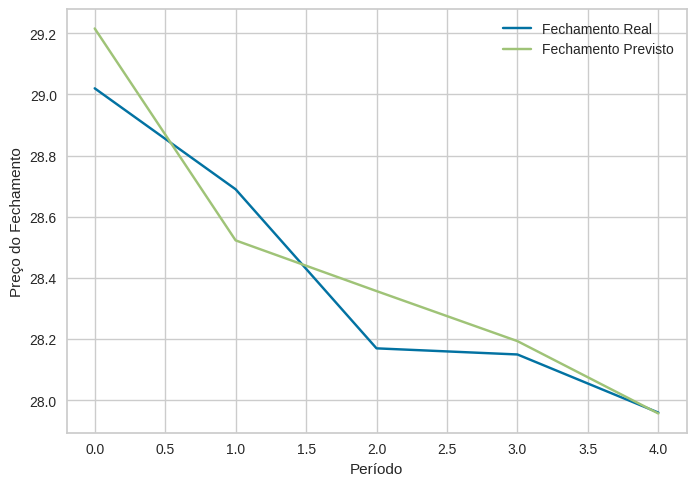

In [56]:
plt.ylabel('Preço do Fechamento')
plt.xlabel('Período')
plt.plot(prev['Close'])
plt.plot(prev['prediction_label'])
plt.legend(['Fechamento Real','Fechamento Previsto'])